In [1]:
import pandas as pd
import numpy as np

# Train Data Set
### We will do cleaning and feature engineering separately on Train and Test data to avoid *Data Leakage*

In [2]:
df_train = pd.read_excel(r"Data_Train.xlsx")
display(df_train.head())
print("-"*120)
display(df_train.tail())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


------------------------------------------------------------------------------------------------------------------------


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
print("The shape of the dataset is {} rows and {} columns".format(df_train.shape[0],df_train.shape[1]))

The shape of the dataset is 10683 rows and 11 columns


Filling NA values

In [5]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As we can see there is only 1 null value in Data Set that too in Route and Total Stops columns

In [6]:
df_train.loc[df_train['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
df_train.loc[df_train['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
df_train.loc[(df_train['Airline'] == "Air India") & (df_train['Source'] == "Delhi") & (df_train['Destination'] == "Cochin") & 
       (df_train["Duration"] == "23h 40m") & (df_train['Price'] == 7480)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480
7896,Air India,12/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


<font color='blue'>As we can see <b>Air India</b> while travelling from Delhi to Cochin takes <i>1 stop</i> for duration of 23h 40m hence we can replace the missing values in Route with "DEL -> MAA -> COK" and Total_Stops = "1 stop"</font>

In [9]:
df_train["Route"] = df_train["Route"].fillna("DEL → MAA → COK")
df_train["Total_Stops"] = df_train["Total_Stops"].fillna("1 stop")

In [10]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<font color='blue'>Let's Check the unique values in Categorical Columns to find if something is misspelled or something is different from the pack</font>

In [11]:
cat_cols = list(df_train.select_dtypes(['object']).columns)
cat_cols

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [12]:
ls = ['Airline','Source','Destination','Route','Total_Stops','Additional_Info']

In [13]:
# To check the count of unique values in categorical columns
for i in ls:
    x = df_train[i].value_counts()
    print(x)
    print("-"*75)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
---------------------------------------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
---------------------------------------------------------------------------
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
----------------------------------------------------------------

<font color='blue'> We will replace No Info with No info as it means same </font>

In [14]:
df_train['Additional_Info'] = df_train['Additional_Info'].replace(['No Info'],['No info'])

In [15]:
df_train['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [16]:
df_train['Total_Stops'] = df_train['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [17]:
# We will drop the Additional Info column as 80% of values are No-info
# We will drop the Route Variable as Total_stops also denotes same
df_train.drop(["Route"], axis=1, inplace=True)
df_train.drop(["Additional_Info"], axis=1, inplace=True)

In [18]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [19]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [20]:
from pandas_profiling import ProfileReport

In [21]:
profile = ProfileReport(df_train)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# Visualization

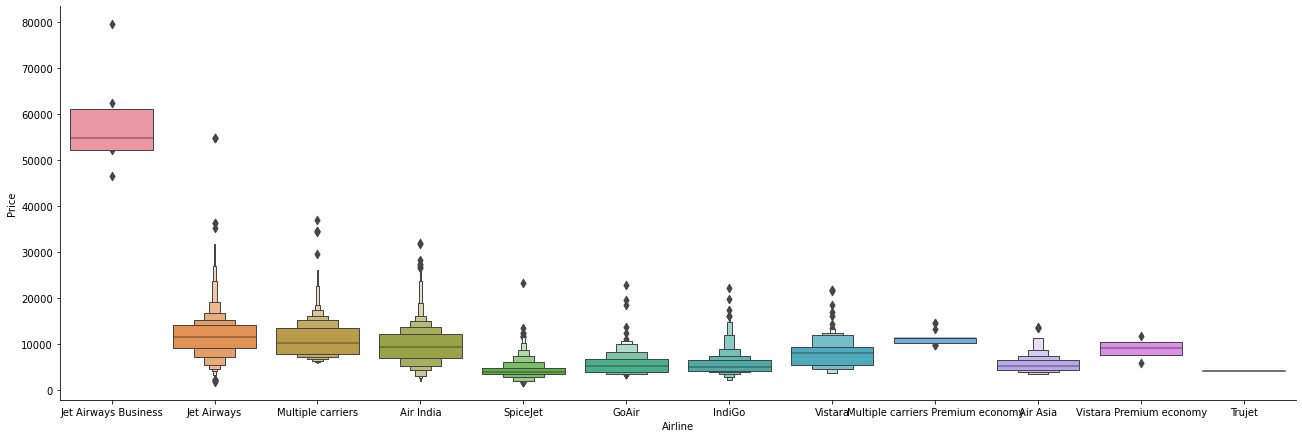

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<font color='blue'>Jet Airways Business has highest Price Range </font>

In [24]:
# We will extract Day, Month and Year to get a sense of the ticket price
df_train["Journey_day"] = pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_train["Journey_month"] = pd.to_datetime(df_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_train["Journey_year"] = pd.to_datetime(df_train["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [25]:
# After exxtarcting Day, Month and Year , Date of Journey is not required
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [26]:
# We will extract Arrival Hour and Arrival Minutes
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

In [27]:
# After extracting Arrival Hour and Minutes, Arrival time is not required
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [28]:
# We will extract Departure Hour and Departure Minutes
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

In [29]:
# After extracting Departure Hour and Departure Minutes, Departure Time is not required
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [30]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [31]:
# Adding duration_hours and duration_mins list to train_data dataframe
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [32]:
#After adding duration_hours and duration_mins , Duration is not required
df_train.drop(["Duration"], axis = 1, inplace = True)

In [33]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,16,50,4,45


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Journey_day     10683 non-null  int64 
 6   Journey_month   10683 non-null  int64 
 7   Journey_year    10683 non-null  int64 
 8   Arrival_hour    10683 non-null  int64 
 9   Arrival_min     10683 non-null  int64 
 10  Dep_hour        10683 non-null  int64 
 11  Dep_min         10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_mins   10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


Jet Airways business has the highest Price Range

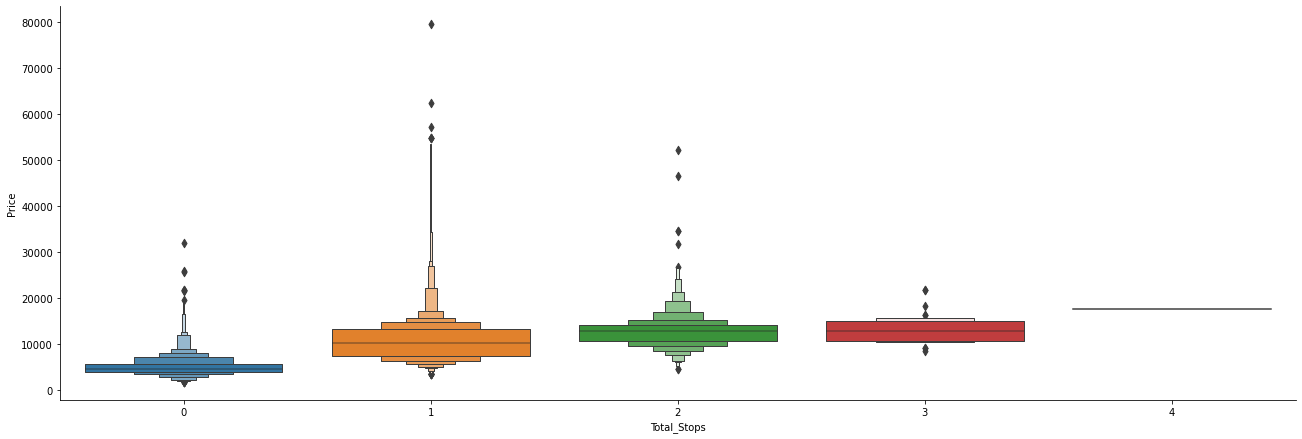

In [35]:
# We will check the price with respct to Stops
sns.catplot(y = "Price", x = "Total_Stops", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<font color='blue'>Price of "1 stop" is higher</font>

<font color='red'>One-Hot Encoding on Nominal Variables</font>

In [36]:
Airline = df_train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

In [37]:
Source = df_train[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

In [38]:
Destination = df_train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [39]:
df_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [40]:
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [41]:
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,23,30,18,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,0,1


# Test Data Set

In [42]:
df_test = pd.read_excel(r"Test_set.xlsx")
display(df_test.head())
print("-"*120)
display(df_test.tail())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


------------------------------------------------------------------------------------------------------------------------


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [43]:
df_test.info()
print('-'*50)
print("The shape of the dataset is {} rows and {} columns".format(df_test.shape[0],df_test.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
--------------------------------------------------
The shape of the dataset is 2671 rows and 10 columns


In [44]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<font color='blue'>Let's Check the unique values in Categorical Columns to find if something is misspelled or something is different from the pack</font>

In [45]:
cat_cols = list(df_test.select_dtypes(['object']).columns)
cat_cols

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [46]:
ls = ['Airline','Source','Destination','Route','Total_Stops','Additional_Info']

In [47]:
# To check the count of unique values in categorical columns
for i in ls:
    x = df_test[i].value_counts()
    print(x)
    print("-"*75)

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
---------------------------------------------------------------------------
DEL → BOM → COK                      624


In [48]:
df_test['Total_Stops'] = df_test['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [49]:
# We will drop the Additional Info column as 80% of values are No-info
# We will drop the Route Variable as Total_stops also denotes same
df_test.drop(["Route"], axis=1, inplace=True)
df_test.drop(["Additional_Info"], axis=1, inplace=True)

In [50]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [51]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_test)
profile

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
# We will extract Day, Month and Year to get a sense of the ticket price
df_test["Journey_day"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test["Journey_year"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [53]:
# After exxtarcting Day, Month and Year , Date of Journey is not required
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [54]:
# We will extract Arrival Hour and Arrival Minutes
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

In [55]:
# After extracting Arrival Hour and Minutes, Arrival time is not required
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [56]:
# We will extract Departure Hour and Departure Minutes
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

In [57]:
# After extracting Departure Hour and Departure Minutes, Departure Time is not required
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [58]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [59]:
# Adding duration_hours and duration_mins list to train_data dataframe
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins

In [60]:
#After adding duration_hours and duration_mins , Duration is not required
df_test.drop(["Duration"], axis = 1, inplace = True)

In [61]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,2019,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,2019,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,2,45,23,55,2,50


<font color='red'>One-Hot Encoding on Nominal Variables</font>

In [62]:
Airline = df_test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

In [63]:
Source = df_test[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

In [64]:
Destination = df_test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [65]:
df_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

In [66]:
df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [67]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,4,25,17,30,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,10,20,6,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,0,19,15,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,21,0,8,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,2,45,23,55,2,50,...,0,0,0,0,0,0,1,0,0,0


In [68]:
X = df_train.loc[:,df_train.columns != 'Price']

In [69]:
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [70]:
y = df_train.loc[:,'Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [71]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

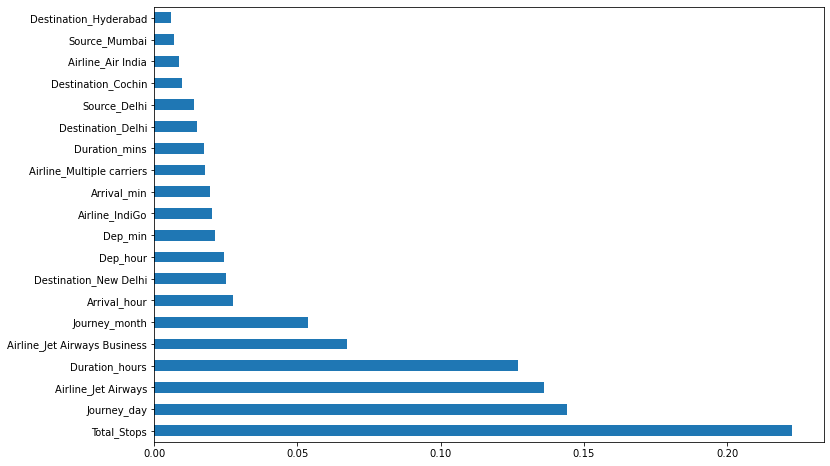

In [72]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting the model

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### To check which model is best fitted

In [74]:
# Applying Lazy Predictor to check which model is best suited for the dataset
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models.head(10)

C:\Users\soham\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:17<00:00,  4.71s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.85,0.85,1797.26,2.33
HistGradientBoostingRegressor,0.82,0.82,1930.64,4.55
LGBMRegressor,0.82,0.82,1936.02,0.68
ExtraTreesRegressor,0.79,0.79,2088.25,8.05
RandomForestRegressor,0.78,0.79,2120.50,9.95
BaggingRegressor,0.78,0.78,2157.09,1.09
GradientBoostingRegressor,0.76,0.77,2214.44,2.83
KNeighborsRegressor,0.76,0.77,2215.19,3.48
ExtraTreeRegressor,0.71,0.72,2455.61,0.14


# XGBRegressor

In [75]:
import xgboost as xgb
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [76]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [77]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9332833257405445


In [78]:
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.83


In [79]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.83


In [80]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 3228757.33
RMSE: 1796.87


In [81]:
test_score= xgbr.score(X_test, y_test)  
print("Test score: ", test_score)

Test score:  0.8474408189565162


In [82]:
ypred

array([12576.865 ,  5928.4707, 14042.678 , ...,  5897.6636,  4781.829 ,
       12089.206 ], dtype=float32)

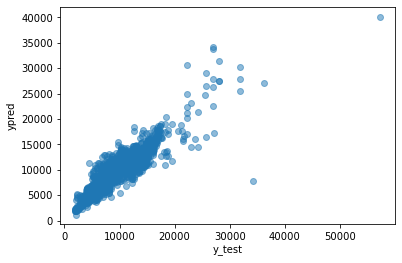

In [83]:
plt.scatter(y_test, ypred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("ypred")
plt.show()

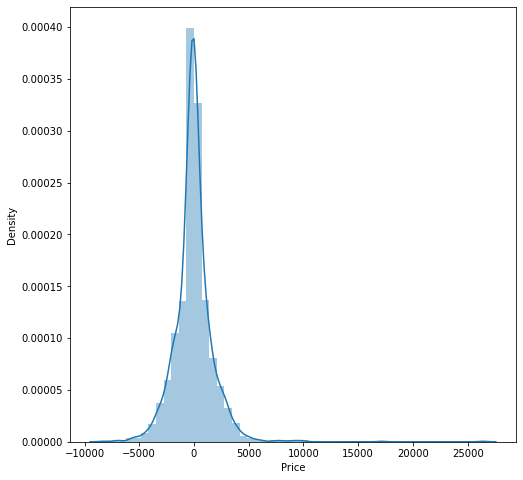

In [84]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-ypred)
plt.show()

In [86]:
len(y_test)

2137

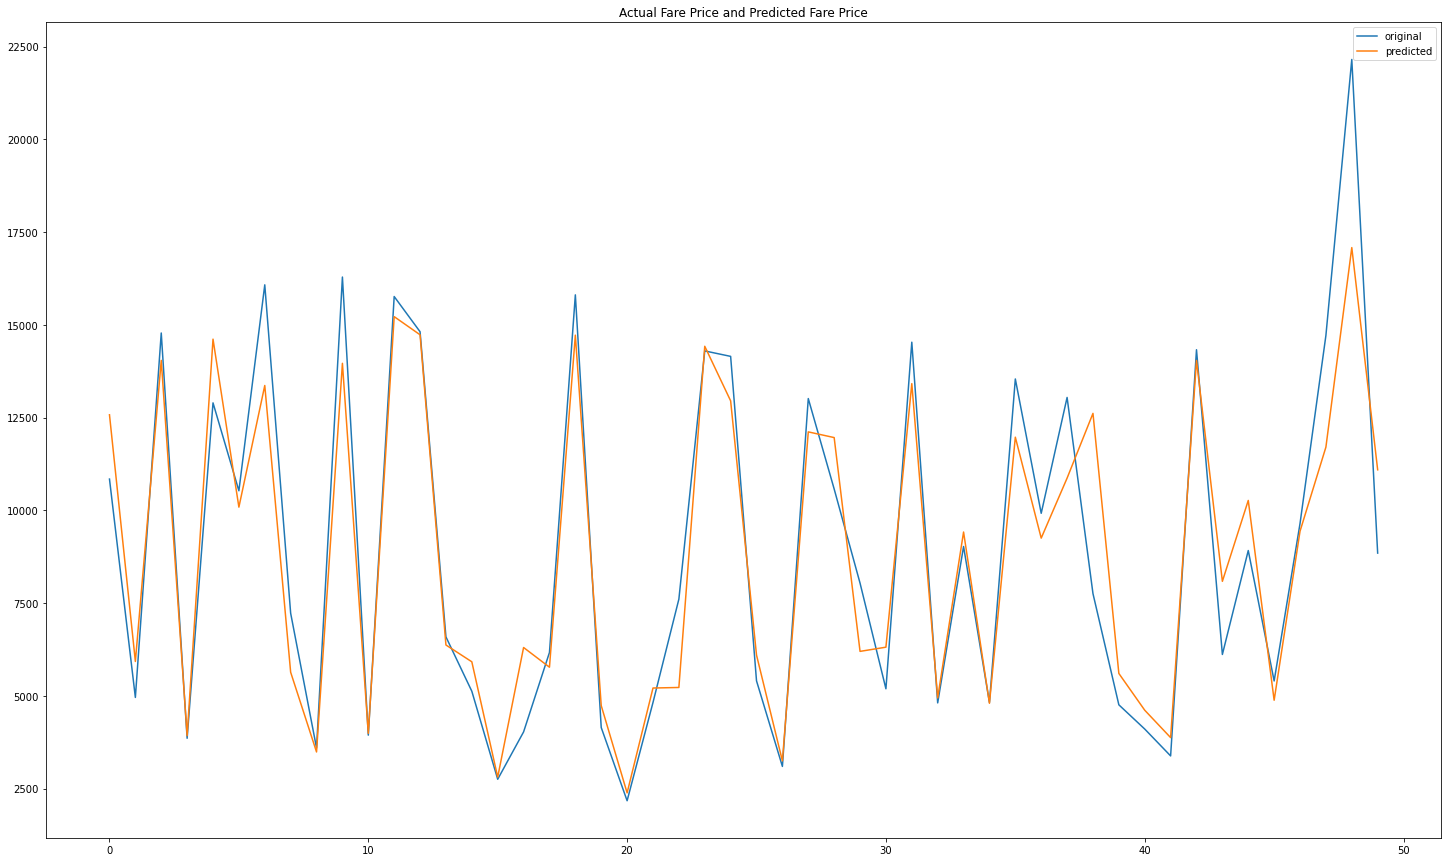

In [91]:
# Plotting of first 50 observations
x_ax = range(len(y_test))
plt.figure(figsize=(25, 15))
plt.plot(x_ax[:50], y_test[:50], label="original")
plt.plot(x_ax[:50], ypred[:50], label="predicted")
plt.title("Actual Fare Price and Predicted Fare Price")
plt.legend()
plt.show()